In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

import wrangle as w

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.

b. Visualize the results of your clustering.

c. Use the elbow method to visually select a good value for k.

d. Repeat the clustering, this time with 3 different features.

In [3]:
new_col_name = []

for col in df.columns:
    new_col_name.append(col.lower().replace('.', '_'))

df.columns = new_col_name

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = df[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [5]:
# scaled df 
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(df,'species')


x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

# pd.concat([x_train_scaled, train[['species'])
x_train_scaled.head()

train -> (84, 5)
validate -> (36, 5)
test -> (30, 5)


,sepal_length,sepal_width,petal_length,petal_width
0,0.529412,0.65,0.649123,0.625000
1,0.147059,0.75,0.052632,0.083333
2,0.411765,0.60,0.666667,0.708333
3,0.176471,0.65,0.122807,0.166667
4,0.705882,0.55,0.771930,0.833333


In [6]:
y_train = y_train.reset_index()
y_train = y_train.drop(columns=['index'])


In [7]:
train_scaled = pd.concat([x_train_scaled, y_train], axis="columns")

In [8]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [9]:
# scaled
# MAKE the thing
scaled = x_train_scaled[['sepal_length', 'sepal_width']]
scaled.head()

kmeans1 = KMeans(n_clusters=3)

# FIT the thing
kmeans1.fit(scaled)

# USE (predict using) the thing 
kmeans1.predict(scaled)

array([1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2], dtype=int32)

In [10]:
# make a new column names cluster in iris and X dataframe
df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2


In [11]:
scaled

,sepal_length,sepal_width
0,0.529412,0.65
1,0.147059,0.75
2,0.411765,0.60
3,0.176471,0.65
4,0.705882,0.55
5,0.411765,0.50
6,0.500000,0.10
7,0.323529,0.45
8,0.176471,0.25
9,0.294118,0.20


In [12]:
#scaled
# make a new column names cluster in iris and X dataframe
scaled['cluster'] = kmeans1.predict(scaled)

# train_scaled['cluster'] = kmeans1.predict(scaled)

scaled.head(3)

,sepal_length,sepal_width,cluster
0,0.529412,0.65,1
1,0.147059,0.75,0
2,0.411765,0.60,1


In [13]:
# visulaize clusters
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,2.00
versicolor,5.936,2.770,4.260,1.326,0.76
virginica,6.588,2.974,5.552,2.026,0.30


In [14]:
# visulaize clusters
scaled1.groupby('species').mean()

NameError: name 'scaled1' is not defined

In [ ]:
scaled

In [ ]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

In [ ]:
#scale
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans1.cluster_centers_

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,sepal_length,sepal_width
0,6.812766,3.074468
1,5.773585,2.692453
2,5.006000,3.428000


In [16]:
# scale
scaled_centroids = pd.DataFrame(kmeans1.cluster_centers_, columns = scaled.columns[:2])
scaled_centroids

,sepal_length,sepal_width
0,0.156471,0.720000
1,0.660714,0.558929
2,0.346300,0.308065


In [17]:
#  Find the mean of the original df and groupby cluster

df.groupby('cluster')['sepal_length', 'sepal_width'].mean()

,sepal_length,sepal_width
cluster,,
0,6.812766,3.074468
1,5.773585,2.692453
2,5.006000,3.428000


In [18]:
# scaled
scaled.groupby('cluster')['sepal_length', 'sepal_width'].mean()

,sepal_length,sepal_width
cluster,,
0,0.156471,0.720000
1,0.660714,0.558929
2,0.346300,0.308065


In [19]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_2
2,4.9,3.0,1.4,0.2,setosa,cluster_2
3,4.7,3.2,1.3,0.2,setosa,cluster_2
4,4.6,3.1,1.5,0.2,setosa,cluster_2
5,5.0,3.6,1.4,0.2,setosa,cluster_2


<Figure size 1400x900 with 0 Axes>

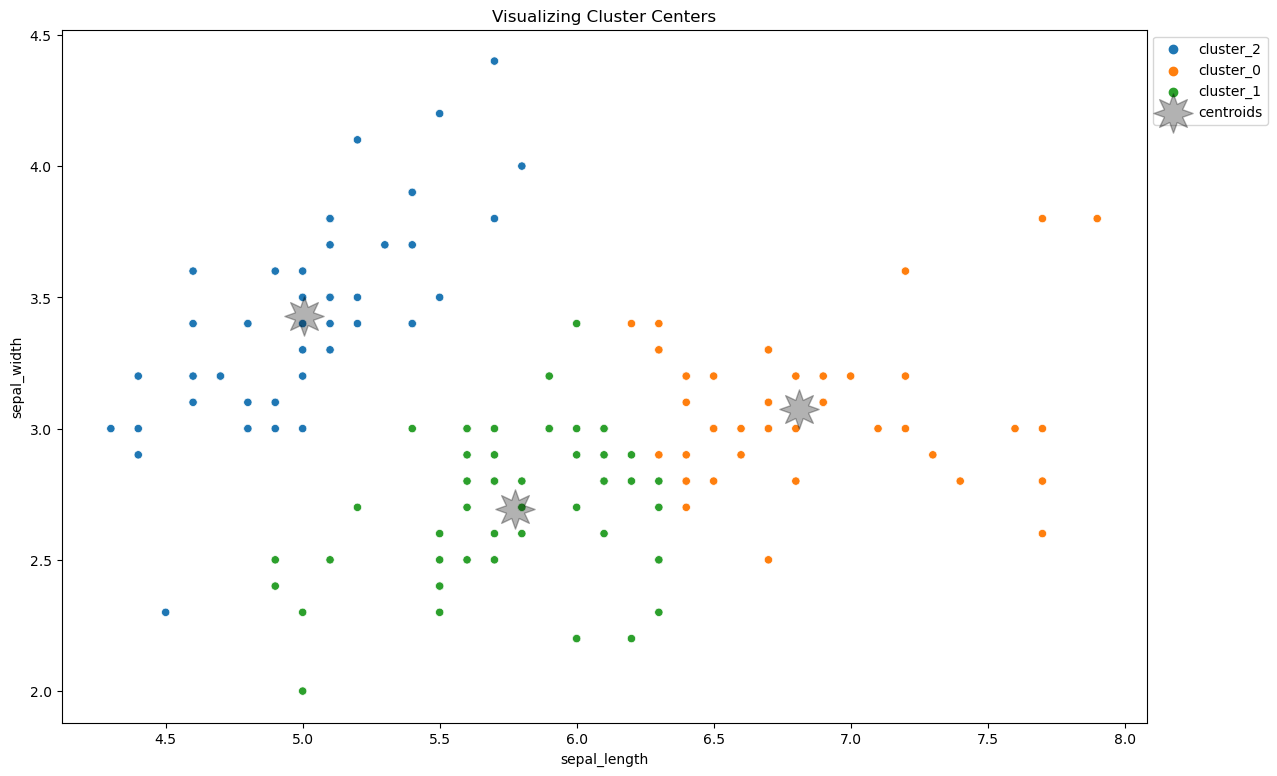

In [20]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'sepal_length', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');


In [21]:
# scaled
visualize_cluster_centers(scaled, 'sepal_length', 'sepal_width')

# the difference in scaled is that some of the dots are now in new categories 

NameError: name 'visualize_cluster_centers' is not defined

In [22]:
kmeans.inertia_

37.05070212765958

In [23]:
k = 4

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans.inertia_

29.809702127659573

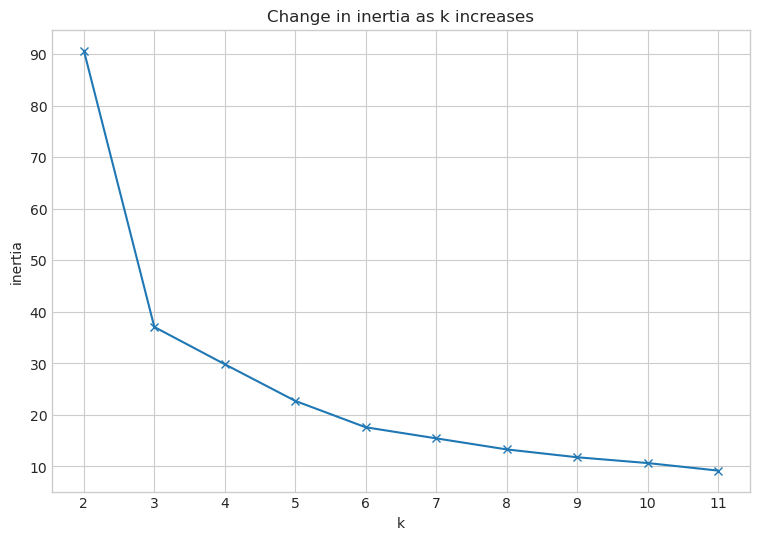

In [24]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
# create a function for future use
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

def plot_inertia(X):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        inertia_values = {k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}
        pd.Series(inertia_values).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        plt.show()


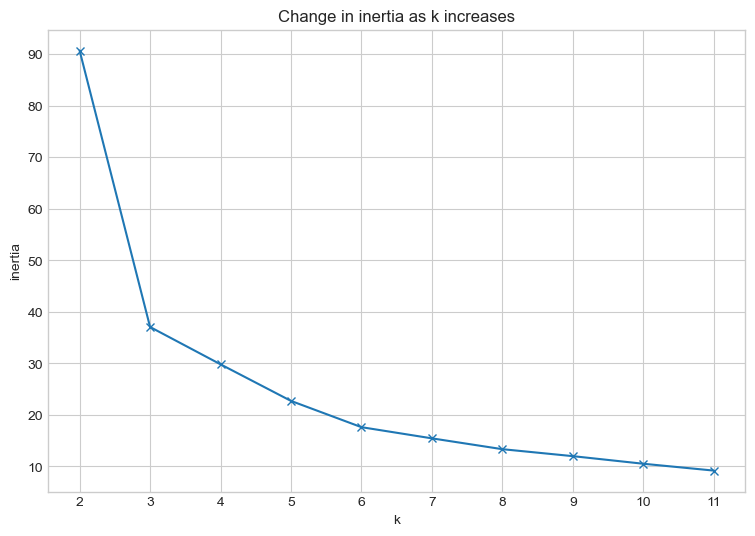

In [26]:
plot_inertia(X)

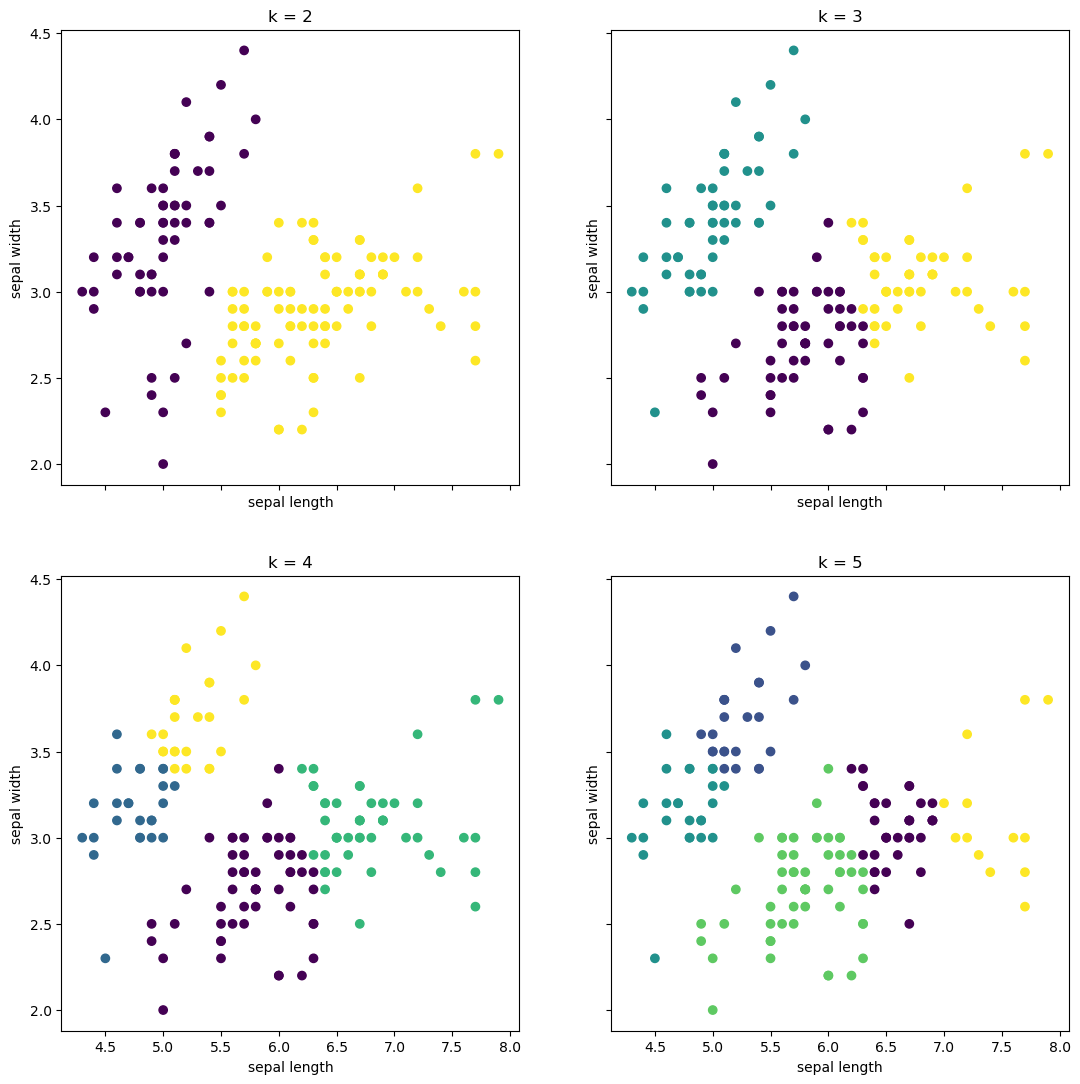

In [27]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

In [28]:
# create into a function

def plot_kmeans_clusters(X, col_1, col_2):
    """
    Plots the scatter plots of clusters for different values of k using the K-means algorithm.

    Parameters:
    X (array-like or dataframe): The input dataset for clustering.

    Returns:
    None (displays a plot)

    """

    fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

    for ax, k in zip(axs.ravel(), range(2, 6)):
        clusters = KMeans(k).fit(X).predict(X)
        ax.scatter(X[col_1], X[col_2], c=clusters)
        ax.set(title='k = {}'.format(k), xlabel=col_1, ylabel=col_2)

    plt.tight_layout()
    plt.show()


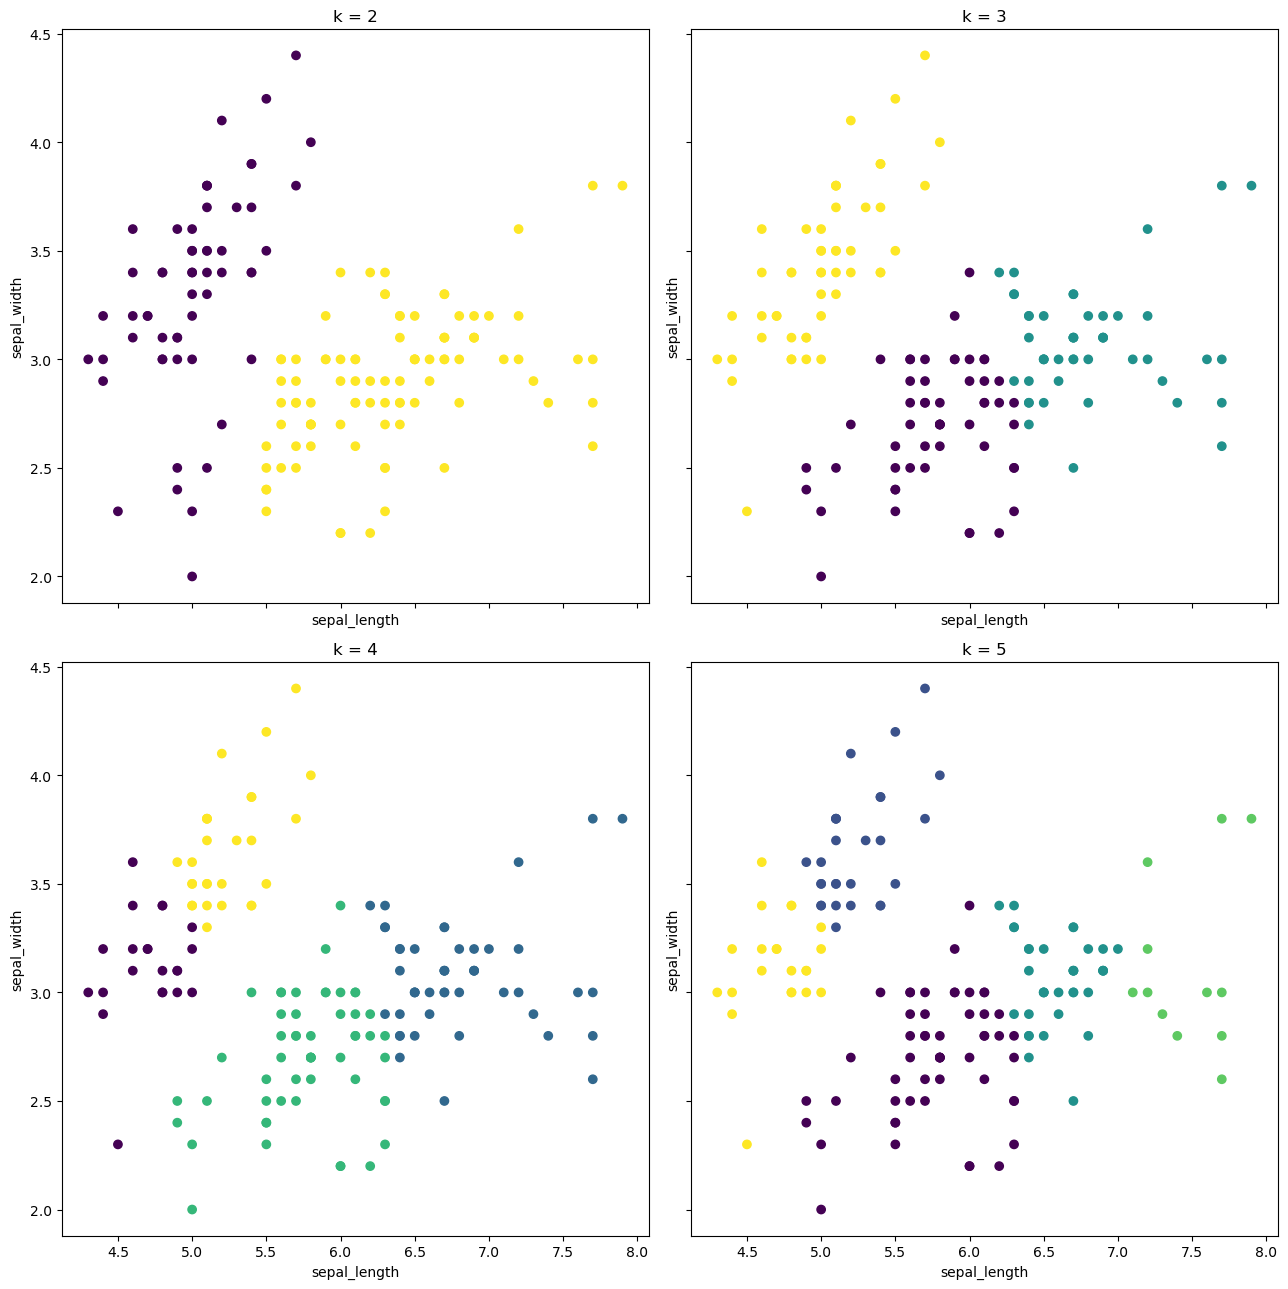

In [29]:
plot_kmeans_clusters(X, col_1='sepal_length', col_2='sepal_width')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [40]:
mall_query = '''
             SELECT *
             FROM customers
             '''
#use our function inside env to create the url
mall_df = w.get_data_mysql('mall_customers',mall_query )

In [41]:
mall_df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [42]:
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test =w.clean_scale_mall(mall_df, 'spending_score')

train -> (112, 6)
validate -> (48, 6)
test -> (40, 6)


In [43]:
x_train

,customer_id,gender,age,annual_income,Male
123,124,Male,0.403846,0.442623,1
76,77,Female,0.519231,0.319672,0
171,172,Male,0.192308,0.590164,1
10,11,Male,0.942308,0.032787,1
35,36,Female,0.057692,0.147541,0
39,40,Female,0.038462,0.180328,0
98,99,Male,0.576923,0.377049,1
57,58,Male,0.980769,0.237705,1
103,104,Male,0.153846,0.385246,1
44,45,Female,0.596154,0.196721,0


In [44]:
# age and annual income 

age_income = x_train[['age', 'annual_income']]

# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(age_income)

# USE (predict using) the thing 
kmeans.predict(age_income)


# make a new column names cluster in iris and X dataframe
x_train['cluster'] = kmeans.predict(age_income)

age_income['cluster'] = kmeans.predict(age_income)



In [45]:
# Cluster Centers aka centroids. 


kmeans.cluster_centers_

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = age_income.columns[:2])
centroids

,age,annual_income
0,0.130457,0.208906
1,0.729121,0.298361
2,0.340865,0.584221


In [46]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 1], dtype=int32)

In [47]:
# age_income['cluster'] = 'cluster_' + age_income.cluster.astype(str)
# age_income.head()

In [48]:
import model as m

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cluster_centers(df, x, y):
    """
    Visualizes the clusters along with the centers on unscaled data.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data and cluster labels.
    x (str): Name of the column for the x-axis in the scatter plot.
    y (str): Name of the column for the y-axis in the scatter plot.

    Returns:
    None (displays a plot)

    """
    plt.figure(figsize=(14, 9))

    # Scatter plot of data with hue for cluster
    sns.scatterplot(x=df[x], y=df[y], data=df, hue='cluster')

    # Plot cluster centers (centroids)
    centroids = df.groupby('cluster')[[x, y]].mean()
    centroids.plot.scatter(x=x, y=y, ax=plt.gca(), color='k', alpha=0.3, s=800, marker=(8, 1, 0), label='centroids')

    plt.title('Visualizing Cluster Centers')

    # Get unique cluster labels
    unique_clusters = df['cluster'].unique()

    # Create legend labels for clusters
    cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()


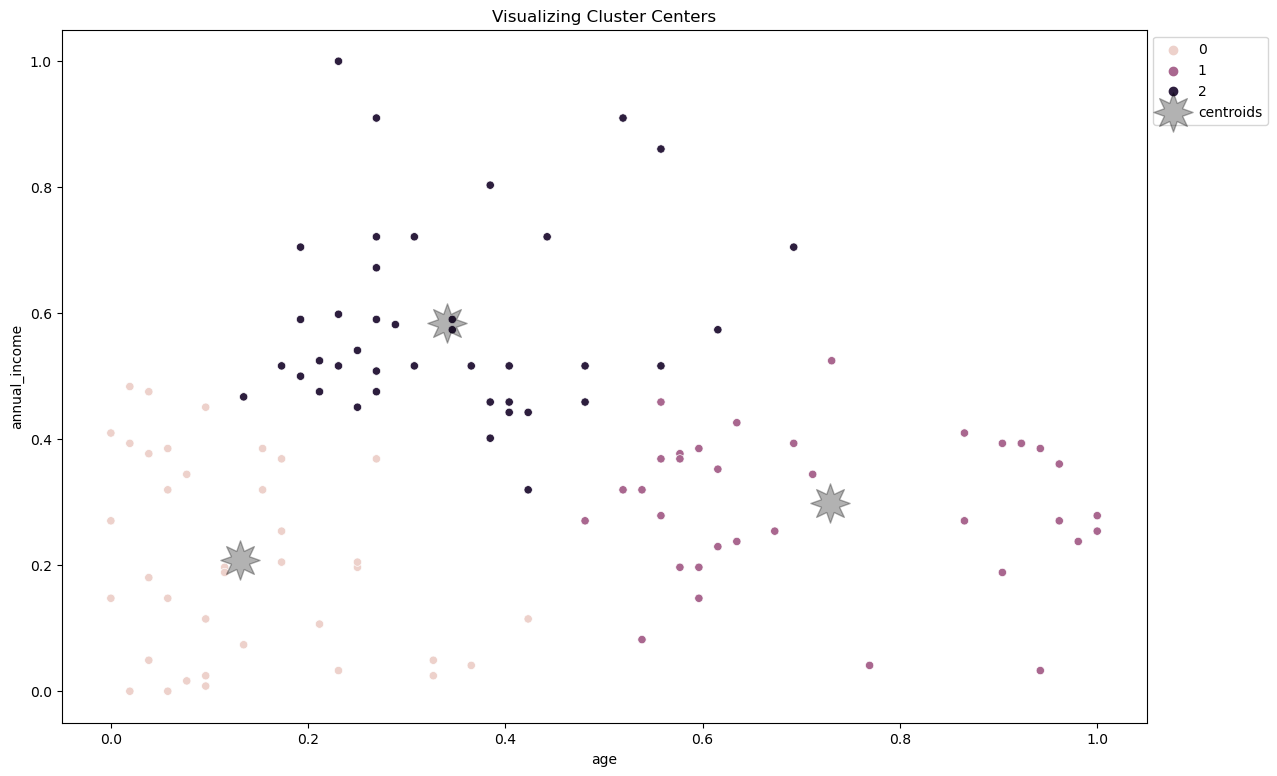

In [50]:
visualize_cluster_centers(age_income, 'age', 'annual_income')

In [32]:
m.plot_inertia(age_income)

NameError: name 'm' is not defined

In [33]:
# i think 3 is the best 

In [ ]:
m.plot_kmeans_clusters(age_income, 'age', 'annual_income')

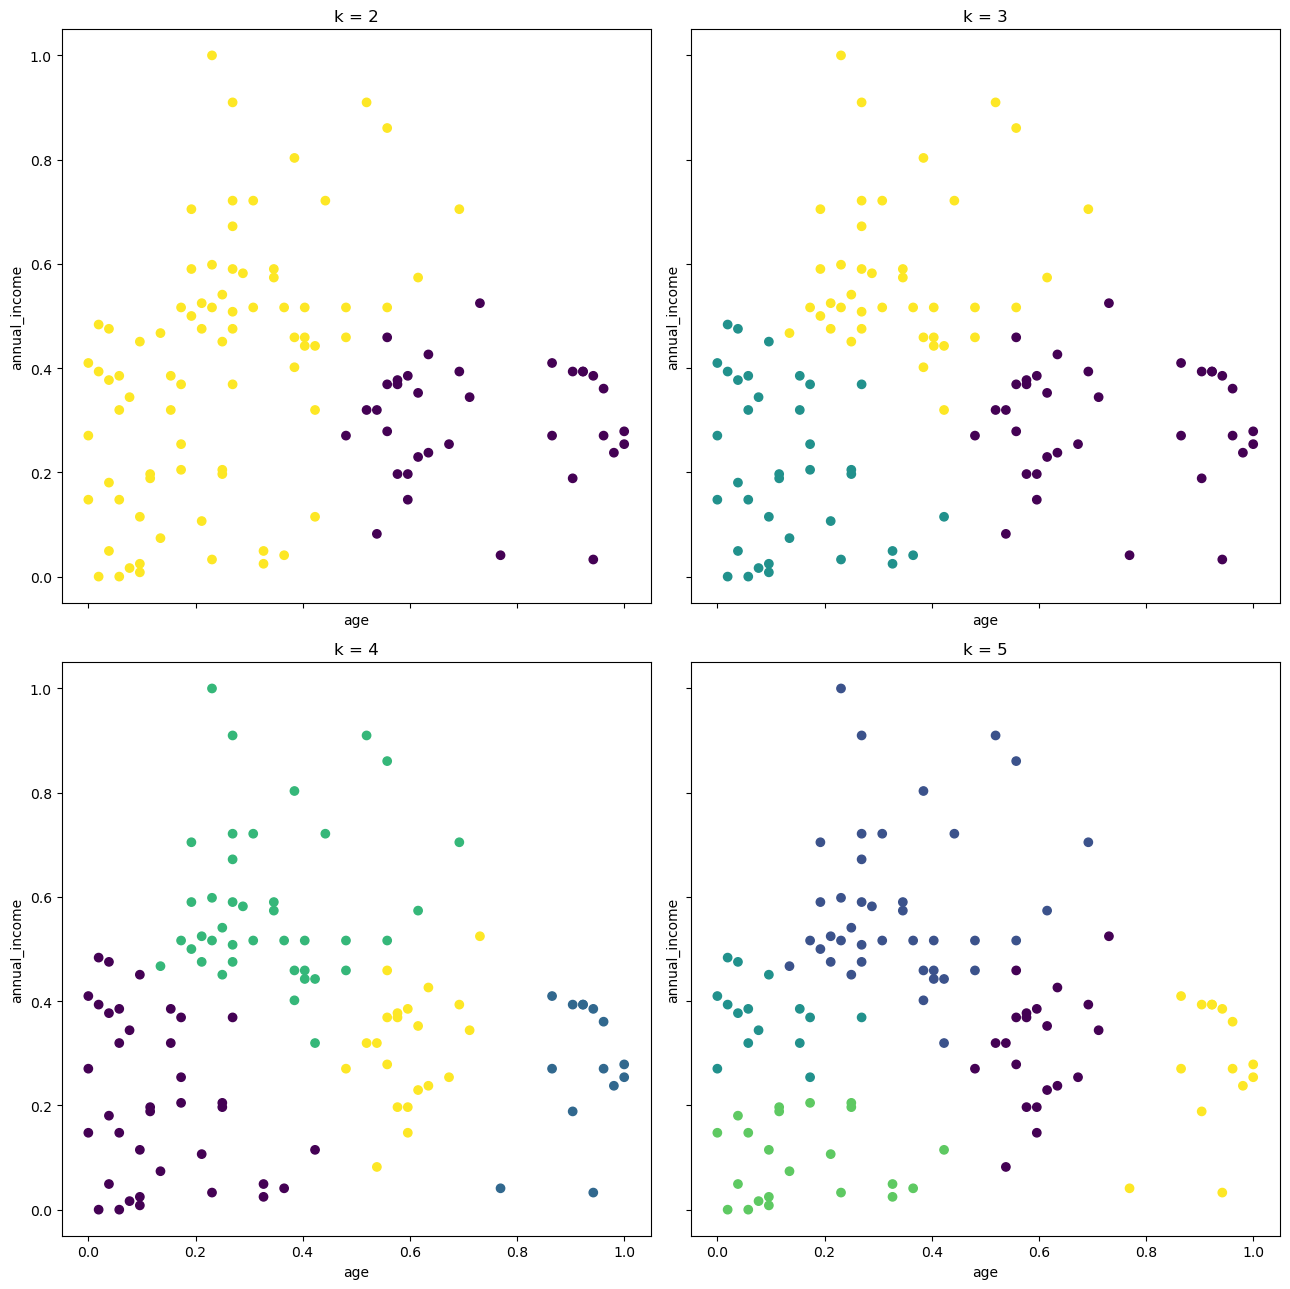

In [34]:
m.plot_kmeans_clusters(age_income, 'age', 'annual_income')

In [220]:
spend_income = train[['spending_score', 'annual_income']]

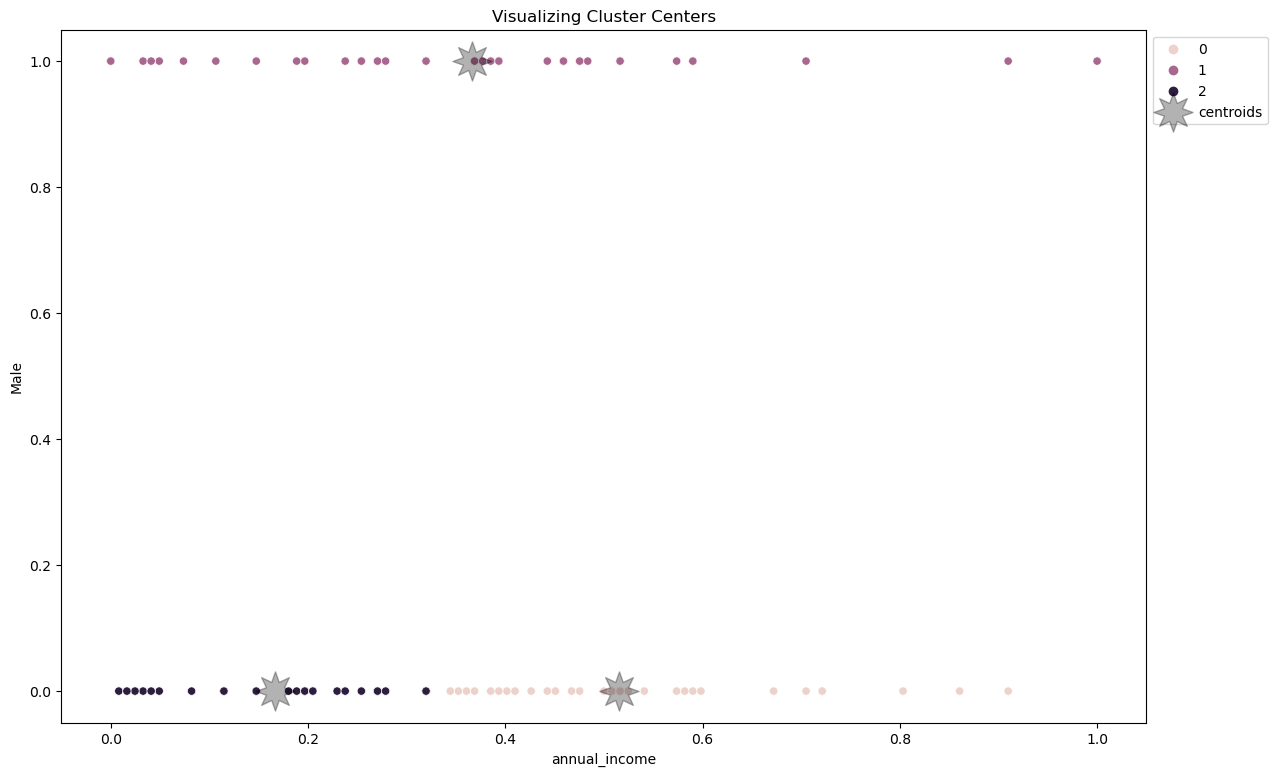

In [44]:
# income gender
male_income = x_train[['Male', 'annual_income']]
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(male_income)

# USE (predict using) the thing 
kmeans.predict(male_income)


# make a new column names cluster in iris and X dataframe
x_train['cluster'] = kmeans.predict(male_income)

male_income['cluster'] = kmeans.predict(male_income)

visualize_cluster_centers(male_income, 'annual_income', 'Male')

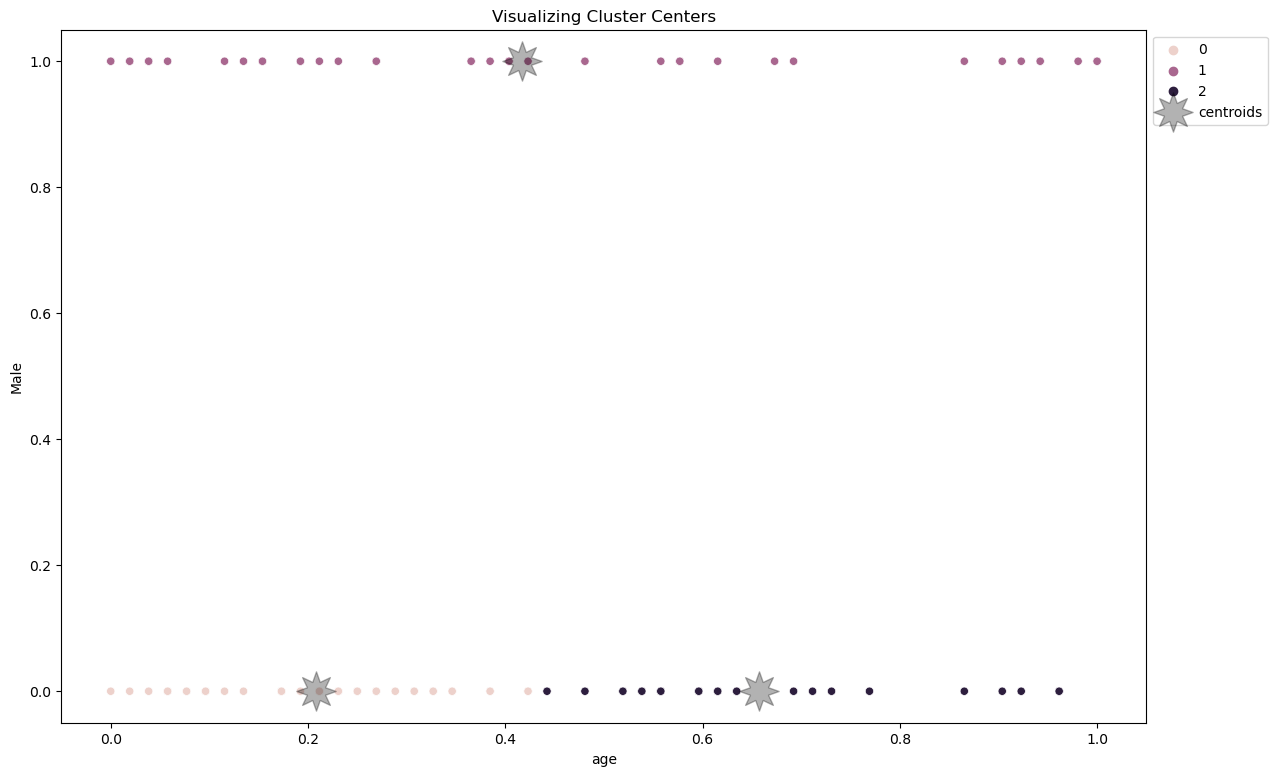

In [45]:
# income gender
male_age = x_train[['Male', 'age']]
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(male_age)

# USE (predict using) the thing 
kmeans.predict(male_age)


# make a new column names cluster in iris and X dataframe
x_train['cluster'] = kmeans.predict(male_age)

male_age['cluster'] = kmeans.predict(male_age)

visualize_cluster_centers(male_age, 'age', 'Male')

In [75]:
# bonus - unscaled 
cluster_df = pd.read_csv("cluster_data.csv")

# split df
train, validate, test = w.split_data(cluster_df)

# MAKE the thing
kmeans_2 = KMeans(n_clusters=4, random_state = 123)

# FIT the thing
kmeans_2.fit(train)

# USE (predict using) the thing 
kmeans_2.predict(train)


# make a new column names cluster in iris and X dataframe
train['cluster'] = kmeans_2.predict(train)


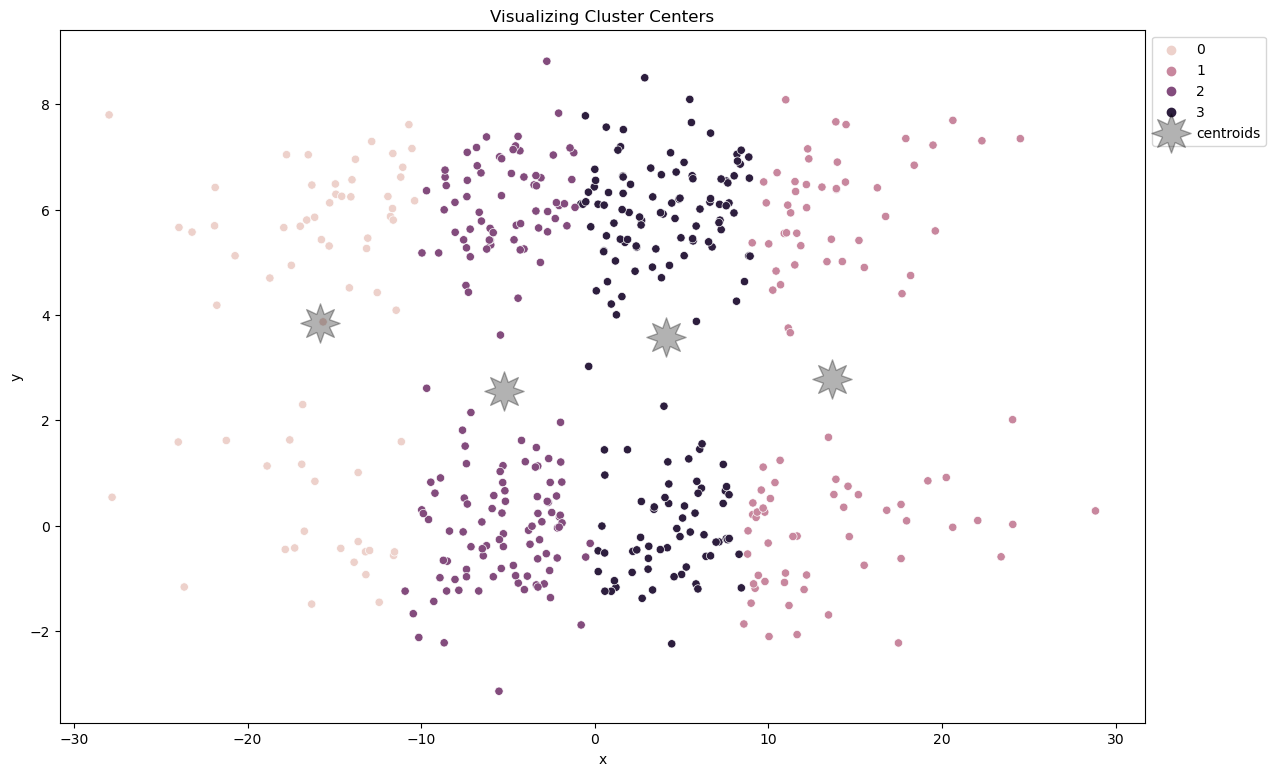

In [76]:
visualize_cluster_centers(train, 'x', 'y')

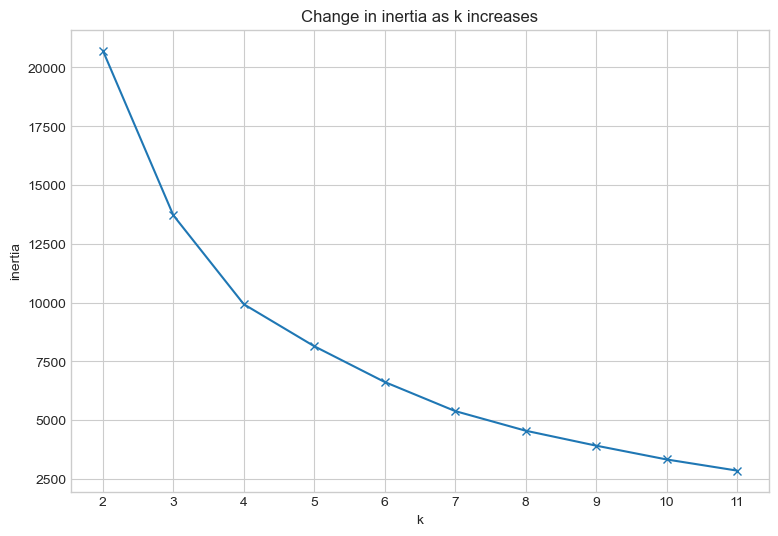

In [60]:
m.plot_inertia(train)

In [52]:
# bonus - scaled 
cluster_df = pd.read_csv("cluster_data.csv")

# scale df
train, validate, test = w.split_data(cluster_df)

# split
# MAKE the thing
kmeans_2 = KMeans(n_clusters=8)

# FIT the thing
kmeans_2.fit(cluster_df)

# USE (predict using) the thing 
kmeans_2.predict(cluster_df)


# make a new column names cluster in iris and X dataframe
cluster_df['cluster'] = kmeans_2.predict(cluster_df)
